# Fancy example

Import the necessary packages.

In [1]:
using ConservationLawsParticles
using RecursiveArrayTools, DifferentialEquations, Plots

Define the model.

In [2]:
Vt(t, x) = -(x - sin(3t))^3
Wprime(t, r) = - 5sin(4t)^2 * sign(r) / (abs(r) + 1)
mob(rho) = max(1 - rho, 0)

model = SampledModel((Vt,), ((Wprime,),), (mob,))

SampledModel{1, Tuple{typeof(Vt)}, Tuple{Tuple{typeof(Wprime)}}, Tuple{typeof(mob)}}((Vt,), ((Wprime,),), (mob,))

Define the ODE problem and solve it.

In [8]:
x0 = ArrayPartition(vcat(LinRange(-1,-.5,100), LinRange(0,.5,100)))
tspan = (0., 10.)
prob = ODEProblem(velocities_gen!, x0, tspan, model)

abstol, reltol = 1e-7, 1e-7
@timev sol = solve(prob, BS5(); abstol=abstol, reltol=reltol)
length(sol)

  2.745115 seconds (34.15 k allocations: 35.409 MiB)
elapsed time (ns): 2745114910
bytes allocated:   37128640
pool allocs:       27727
non-pool GC allocs:6418


844

Plot the trajectories.

In [4]:
plot(sol, vars=1:8:200, legend=false, color=:blue,
    title="Trajectories", xlabel="time", ylabel="space", size=(600,300))
savefig("plots/fancy.png")
plot!()

Plot an animation of the density.

┌ Info: Saved animation to 
│   fn = /home/fstra/Documents/particles/ConservationLawsParticles.jl/examples/plots/fancy.gif
└ @ Plots /home/fstra/.julia/packages/Plots/Awg62/src/animation.jl:104


Plots.AnimatedGif("/home/fstra/Documents/particles/ConservationLawsParticles.jl/examples/plots/fancy.gif")
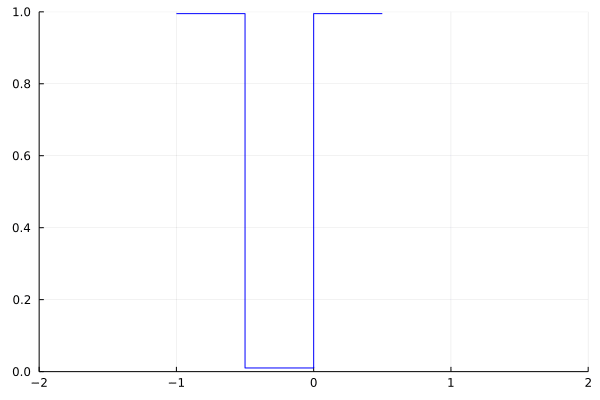

In [9]:
anim = @animate for t in range(tspan..., step=1/24)
    plot_density(sol(t), color=:blue, legend=false, xrange=(-2,2), yrange=(0,1))
end
g = gif(anim, "plots/fancy.gif")